<a href="https://colab.research.google.com/github/eslavathjagadish/Natural_Language_Processing/blob/main/Amazon%20Alexa_improvement_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Data processing 
import numpy as np #Linear Algebra
import os #Path
import matplotlib.pyplot as plt #Visualizing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
Data = pd.read_csv('/content/drive/MyDrive/amazon_alexa.tsv',sep='\t')
Data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
Data.groupby('rating').describe() #Statistical Details

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

CLASSIFY AND ANALYZE BAD REVIEWS

In [5]:
Data=Data[Data.rating!=5]
Data=Data[Data.rating!=4]

In [6]:
Data.head()

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [7]:
Data.shape #modified Data Structure

(409, 5)

In [8]:
Data['index']=range(0,409) #considering the respective features
Data=Data.set_index('index')
Data

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
...,...,...,...,...,...
404,1,30-Jul-18,Black Dot,I didn’t order it,0
405,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,0
406,3,30-Jul-18,Black Dot,,1


SYNTACTIC & SEMANTIC ANALYSIS

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#PortStemmer is a process of normalization
#Example
TEXT='kiss kissed kisses know knowing last lasting'
stemmer=PorterStemmer()
Norm_Word=stemmer.stem(TEXT)
Tokens=TEXT.split()
" ".join(stemmer.stem(token) for token in Tokens)

'kiss kiss kiss know know last last'

In [11]:
#Eliminating words with high frequency or mostly occuring by creating the corpus list
STOPWORDS=set(stopwords.words('english'))
corpus=[]
for i in range(0,409):
  review=re.sub('[^a-zA-Z]',' ',Data['verified_reviews'][i])
  review=review.lower()
  review=review.split()
  stemmer=PorterStemmer()
  review=[stemmer.stem(token) for token in  review if not token in STOPWORDS]
  review=' '.join(review)
  corpus.append(review)
corpus

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w

FINDING MOST COMMONLY USED WORDS

In [12]:
#Tokenization of words in List
words=[]
for i in range(0,len(corpus)):
  words=words+(re.findall(r'\w+',corpus[i]))
words

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [13]:
from collections import Counter

In [14]:
words_counts=Counter(words) #To count the repeated words in data 
print(words_counts)

Counter({'echo': 150, 'work': 140, 'alexa': 108, 'devic': 108, 'use': 88, 'amazon': 84, 'like': 81, 'get': 77, 'dot': 76, 'time': 73, 'sound': 71, 'would': 70, 'speaker': 69, 'music': 60, 'one': 58, 'product': 57, 'tri': 53, 'thing': 53, 'play': 52, 'set': 51, 'need': 48, 'ask': 44, 'want': 44, 'buy': 44, 'connect': 43, 'screen': 43, 'better': 41, 'also': 41, 'qualiti': 40, 'show': 38, 'realli': 37, 'bought': 37, 'even': 37, 'good': 36, 'turn': 36, 'hub': 34, 'know': 33, 'well': 33, 'great': 32, 'much': 31, 'disappoint': 31, 'bulb': 31, 'could': 30, 'still': 30, 'alarm': 29, 'prime': 29, 'day': 29, 'light': 29, 'app': 27, 'back': 27, 'say': 26, 'return': 26, 'home': 26, 'see': 25, 'googl': 25, 'make': 25, 'purchas': 24, 'problem': 24, 'phone': 24, 'hear': 23, 'got': 23, 'stop': 23, 'go': 23, 'seem': 22, 'way': 22, 'money': 22, 'refurbish': 22, 'video': 22, 'question': 21, 'unit': 21, 'wifi': 21, 'mani': 20, 'differ': 20, 'plu': 20, 'understand': 20, 'sure': 20, 'item': 20, 'start': 20,

In [15]:
most_common_words=sorted(words_counts.items(),key=lambda x:x[1],reverse=False) #Sorting the words in Manner
most_common_words

[('mine', 1),
 ('asap', 1),
 ('man', 1),
 ('cordless', 1),
 ('paus', 1),
 ('pattern', 1),
 ('promp', 1),
 ('arent', 1),
 ('besid', 1),
 ('naw', 1),
 ('dollar', 1),
 ('store', 1),
 ('foot', 1),
 ('trust', 1),
 ('fm', 1),
 ('nativ', 1),
 ('whose', 1),
 ('north', 1),
 ('texa', 1),
 ('birth', 1),
 ('addit', 1),
 ('margin', 1),
 ('extend', 1),
 ('offic', 1),
 ('ten', 1),
 ('dust', 1),
 ('collector', 1),
 ('acknowledg', 1),
 ('indic', 1),
 ('sentenc', 1),
 ('action', 1),
 ('weari', 1),
 ('widespread', 1),
 ('push', 1),
 ('rep', 1),
 ('spoke', 1),
 ('spank', 1),
 ('lay', 1),
 ('moana', 1),
 ('sh', 1),
 ('unlimit', 1),
 ('game', 1),
 ('signific', 1),
 ('portabl', 1),
 ('shell', 1),
 ('sink', 1),
 ('ran', 1),
 ('substitut', 1),
 ('highest', 1),
 ('sold', 1),
 ('standard', 1),
 ('guarante', 1),
 ('junk', 1),
 ('uncl', 1),
 ('haywir', 1),
 ('soft', 1),
 ('rais', 1),
 ('dunno', 1),
 ('guy', 1),
 ('rambl', 1),
 ('unhelp', 1),
 ('script', 1),
 ('spiel', 1),
 ('norm', 1),
 ('finicki', 1),
 ('ghz', 1)

In [16]:
#Pharsing the tokenized data in word and count wise LIST
most_common_wordList=[]
most_common_CountList=[]
for x,y in most_common_words:
  most_common_wordList.append(x)
  most_common_CountList.append(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


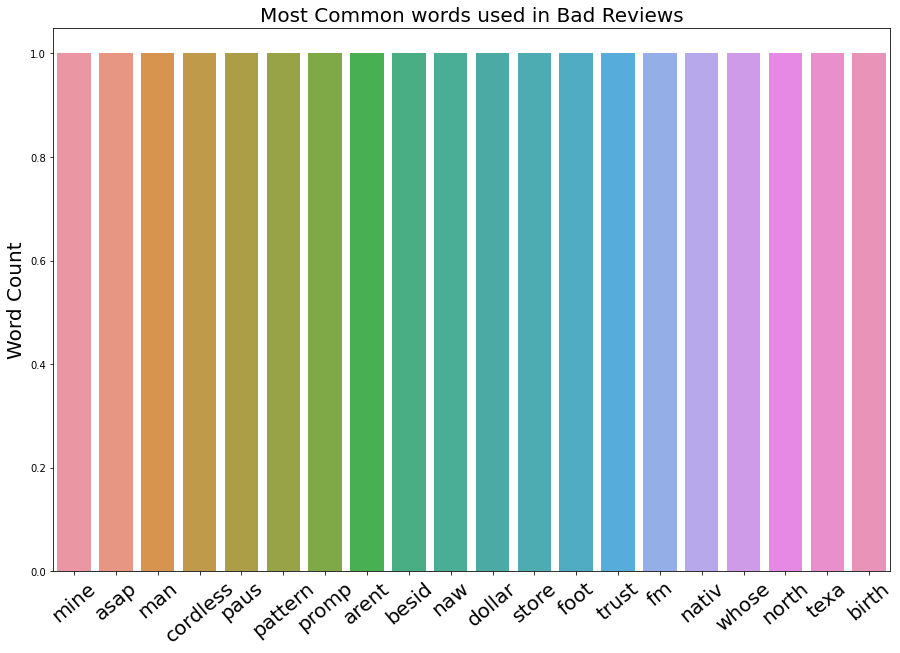

In [17]:
#Plotting the features of most repeated words in Bad Reviews
import seaborn as sns
plt.figure(figsize=(15,10))
plot=sns.barplot(np.arange(20),most_common_CountList[0:20])
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20),most_common_wordList[0:20],fontsize=20,rotation=40)
plt.title('Most Common words used in Bad Reviews',fontsize=20)
plt.show()

FROM ABOVE VISUALIZATION REQUIRED IMPROVEMENT IN AUDIO FROM HARDWARE AND SOFTWARE O/P SYSTEM

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
texts=['good movie','not a good movie','did not like','good one']

In [26]:
tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))
features=tfidf.fit_transform(texts)
tfidf.get_feature_names()

['good movie', 'movie', 'not']

In [27]:
Vectorize=TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1,2),min_df=2)
X=Vectorize.fit_transform(corpus).toarray()
y=Data['feedback']

CLASSIFYING WITH CATEGORICAL ALGORITHMS

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,auc

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123)

RANDOM FOREST CLASSIFIER

In [32]:
model=RandomForestClassifier(n_estimators=205,max_features='auto')
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=205)

In [33]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy for Random Forest:\t'+str(accuracy))
print('Precision for Ranndom Forest:\t'+str(precision_score(y_test,y_pred)))
print('Recall for RandomForest:\t'+str(recall_score(y_test,y_pred)))

Accuracy for Random Forest:	0.7378640776699029
Precision for Ranndom Forest:	0.8571428571428571
Recall for RandomForest:	0.32432432432432434


GRADIENT BOOSTING CLASSIFIER

In [34]:
model2=GradientBoostingClassifier(learning_rate=1.5,verbose=2,max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1345            1.22s
         2           1.0356            1.04s
         3           0.8911            0.97s
         4           0.8253            0.94s
         5           0.7470            0.91s
         6           0.6782            0.89s
         7           0.6155            0.87s
         8           0.5479            0.85s
         9           0.4815            0.83s
        10           0.4393            0.82s
        11           0.3988            0.81s
        12           0.3626            0.80s
        13           0.3400            0.79s
        14           0.3130            0.78s
        15           0.2815            0.77s
        16           0.2651            0.76s
        17           0.2402            0.74s
        18           0.2285            0.73s
        19           0.2192            0.72s
        20           0.2128            0.71s
        21           0.2071            0.70s
        2

GradientBoostingClassifier(learning_rate=1.5, max_features='auto', verbose=2)

In [35]:
y_pred2=model2.predict(x_test)
accuracy2=accuracy_score(y_test,y_pred2)
print("Accuracy for GradientBoosting:\t"+str(accuracy2))
print("Precision for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))

Accuracy for GradientBoosting:	0.6601941747572816
Precision for GradientBoosting:	0.53125
Recall for GradientBoosting:	0.4594594594594595


In [39]:
prob_1=model.predict_proba(x_test)
prob_1 = prob_1[:,1]# Probalility prediction for Rangomforest classifier
prob_2=model2.predict_proba(x_test)
prob_2 = prob_2[:,1]# Probalility prediction for GradientBoosting classifier

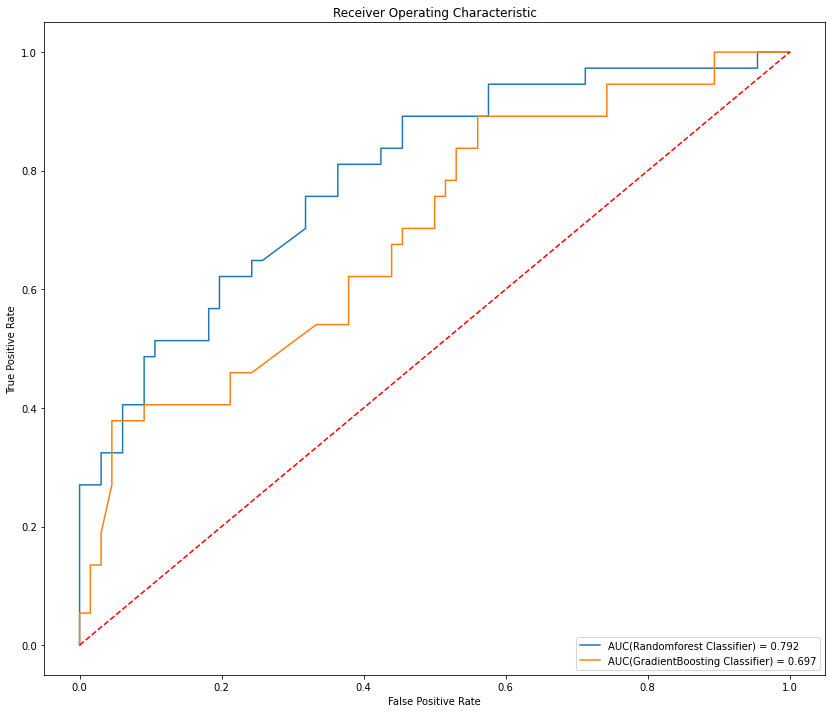

In [40]:
fpr1, tpr1, _ = roc_curve(y_test, prob_1)
fpr2, tpr2, _ = roc_curve(y_test, prob_2)
plt.figure(figsize=(14,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC(Randomforest Classifier) = %0.3f' % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, label = 'AUC(GradientBoosting Classifier) = %0.3f' % auc(fpr2, tpr2))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()